# Machine Learning Model

## Supervised ML 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## import dataset

In [4]:
supply_demand = pd.read_csv('Resources/Datasets/cleaned_data/supply_demand.csv')
import_export = pd.read_csv('Resources/Datasets/cleaned_data/import_export.csv')
price_by_type = pd.read_csv('Resources/Datasets/cleaned_data/price_by_type.csv')
gas_storage = pd.read_csv('Resources/Datasets/cleaned_data/storage_vol.csv')

## Preprocessing Data

In [5]:
supply_demand = supply_demand.drop(columns='Unnamed: 0')
import_export = import_export.drop(columns='Unnamed: 0')

In [6]:
supply_demand.head()

,Year,Month,Gas_Procution(Mmcf),Gas_Consumption(Mmcf)
0,2022,2,2856356,3040029.0
1,2022,1,3180818,3591557.0
2,2021,12,3266272,2979653.0
3,2021,11,3161306,2659971.0
4,2021,10,3219612,2237715.0


In [7]:
supply_demand['Market_status'] = supply_demand['Gas_Procution(Mmcf)'] - supply_demand['Gas_Consumption(Mmcf)']

In [8]:
supply_demand['Market_status'] = supply_demand['Market_status'].apply(lambda x: '1' if x >0 else '0')
supply_demand.head()

,Year,Month,Gas_Procution(Mmcf),Gas_Consumption(Mmcf),Market_status
0,2022,2,2856356,3040029.0,0
1,2022,1,3180818,3591557.0,0
2,2021,12,3266272,2979653.0,1
3,2021,11,3161306,2659971.0,1
4,2021,10,3219612,2237715.0,1


In [9]:
X = supply_demand.drop(columns='Market_status')
y = supply_demand['Market_status']
X.shape

(254, 4)

In [10]:
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42, stratify=y)

In [11]:
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [12]:
y_predict = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_predict)

1.0

In [14]:
matrix = confusion_matrix(y_test,y_predict)
print(matrix)

[[28  0]
 [ 0 36]]


In [15]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        36

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



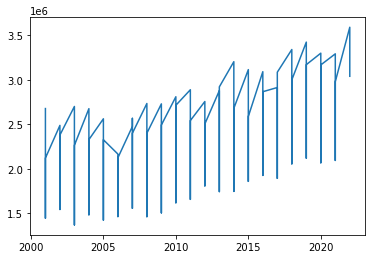

In [30]:
#plot in graph
X = supply_demand['Year']
Y = supply_demand['Gas_Consumption(Mmcf)']
plt.plot(X,Y)
plt.show()

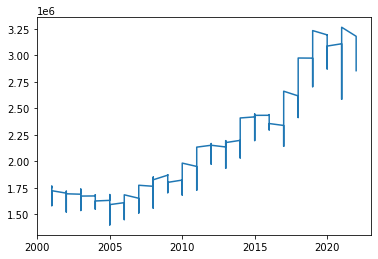

In [29]:
#plot in graph
X = supply_demand['Year']
Y = supply_demand['Gas_Procution(Mmcf)']
plt.plot(X,Y)
plt.show()